# Tutorial 4  for JetSeT v1.2.0-rc3

## Composite Models

In [1]:
from jetset.jet_model import Jet
from jetset.plot_sedfit import PlotSED
from jetset.model_manager import FitModel


Composite models allow to combine together different models, such as Jet, and templates, including additive or multiplicative models, and give to the user the possibility to define the functional form of the model composition using a very simple and intuitive form such as:
```
   'jet1+jet2'*Franceschini_2008
```

that sums two jet models SEDs, and apply to both of them the `Franceschini_2008` EBL absorption.

Building composite models it is very easy. Composite models are handled by   the :class:`.FitModel` class, as shown by the following examples. 

## Combine a Jet model with the EBL model (Multiplicative case)

We start by combining a Jet model with the EBL absorption model, i.e. a multiplicative  model. First, we define our Jet model

In [2]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='lppl',name='jet_flaring')

In [3]:
from jetset.template_2Dmodel import EBLAbsorptionTemplate
ebl_franceschini=EBLAbsorptionTemplate.from_name('Franceschini_2008')

In [4]:
composite_model=FitModel(nu_size=500,name='EBL corrected')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)


/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset-1.2.0rc3-py3.8-macosx-10.9-x86_64.egg/jetset/model_manager.py:160: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


the waring message is just telling that you are not passing any specific cosmology model to the `FitModel` class, so it is using a default one

In [5]:
composite_model.show_pars()

    model name          name             par type           units           val      phys. bound. min phys. bound. max  log  frozen
----------------- ---------------- ------------------- ---------------- ------------ ---------------- ---------------- ----- ------
      jet_flaring                R         region_size               cm 5.000000e+15     1.000000e+03     1.000000e+30 False  False
      jet_flaring              R_H     region_position               cm 1.000000e+17     0.000000e+00               -- False   True
      jet_flaring                B      magnetic_field                G 1.000000e-01     0.000000e+00               -- False  False
      jet_flaring         beam_obj             beaming  Lorentz-factor* 1.000000e+01     1.000000e-04               -- False  False
      jet_flaring           z_cosm            redshift                  1.000000e-01     1.000000e-10               -- False  False
      jet_flaring             gmin  low-energy-cut-off lorentz-factor** 2.00

Since, both the Jet model the EBL share the same parameter, i.e. the redshift, we link the two parameters 

In [6]:
composite_model.link_par(par_name='z_cosm',model_name_list=['Franceschini_2008'],root_model_name='jet_flaring')

In [7]:
composite_model.show_pars()

    model name             name               par type           units           val      phys. bound. min phys. bound. max  log  frozen
----------------- --------------------- ------------------- ---------------- ------------ ---------------- ---------------- ----- ------
      jet_flaring                     R         region_size               cm 5.000000e+15     1.000000e+03     1.000000e+30 False  False
      jet_flaring                   R_H     region_position               cm 1.000000e+17     0.000000e+00               -- False   True
      jet_flaring                     B      magnetic_field                G 1.000000e-01     0.000000e+00               -- False  False
      jet_flaring              beam_obj             beaming  Lorentz-factor* 1.000000e+01     1.000000e-04               -- False  False
      jet_flaring             z_cosm(R)            redshift                  1.000000e-01     1.000000e-10               -- False  False
      jet_flaring                  gmin  

As you can see, now the paramter `z_cosm` in `jet_flaring` is the root parameter (flagged by the R in parenthesis), and the one belonging to the `Franceschini_2008` component is the linked one (flagged by the L in parenthesis).

## Setting parameters

---
**NOTE**
   
with the new implementation of composite model  (`FitModel` class) to set parameters you have to specify the model component, this is different from versions<1.2.0

---

These methods are alternative and equivalent ways to set a parameter in a composite model:

a) accessing the model component member of the 

b) using `set_par` and passing as first argument the model component name

c) using `set_par` and passing as first argument the model component object

In [22]:
#a
composite_model.jet_flaring.parameters.z_cosm.val=0.1
#b
composite_model.set_par('jet_flaring','z_cosm',0.1)
#c
composite_model.set_par(my_jet,'z_cosm',0.1)

And now, we can define the functional form of the model composition, just by writing the mathematical expression as a string, using the model names reported in the model description table, and that's it!

In [23]:
composite_model.show_model_components()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: EBL corrected flaring+steady  
type: composite_model  
components models:
 -model name: jet_flaring model type: jet
 -model name: Franceschini_2008 model type: table2D
 -model name: steady_jet model type: jet

-------------------------------------------------------------------------------------------------------------------


In [24]:
composite_model.composite_expr='jet_flaring*Franceschini_2008'

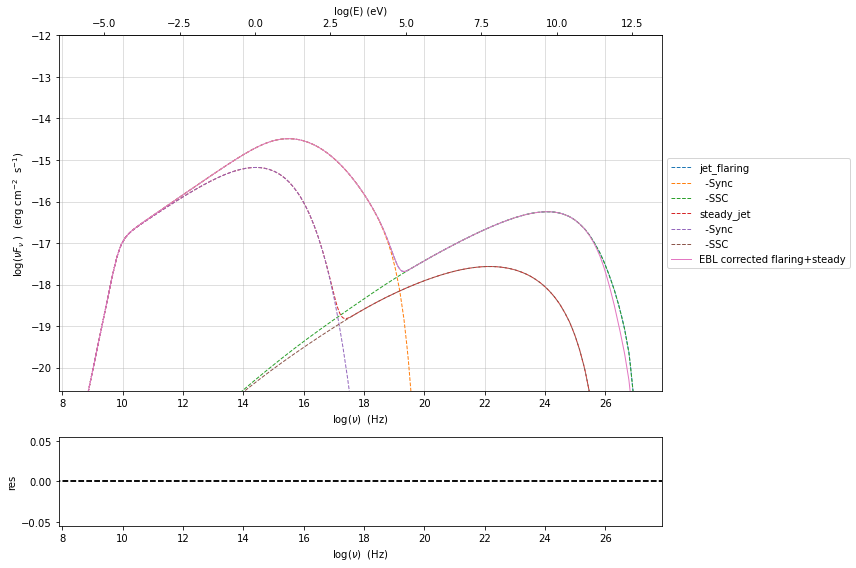

In [25]:
composite_model.jet_flaring.IC_nu_size=150
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_max=-12)

## Sum of two jets (steady and flaring) and application of the EBL absorption to both (Multiplicative and additive)

Assume that now we want to sum to jet models (a steady and flaring component) and apply to both of them the EBL absorption.

In [26]:
composite_model=FitModel(nu_size=500,name='EBL corrected flaring+steady')
composite_model.add_component(my_jet)
composite_model.add_component(ebl_franceschini)

/Users/orion/anaconda3/envs/jetset/lib/python3.8/site-packages/jetset-1.2.0rc3-py3.8-macosx-10.9-x86_64.egg/jetset/model_manager.py:160: UserWarning: no cosmology defined, using default FlatLambdaCDM(name="Planck13", H0=67.8 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0483)
  warnings.warn('no cosmology defined, using default %s'%self.cosmo)


In [27]:
steady_jet=Jet(electron_distribution='plc',name='steady_jet')
composite_model.add_component(steady_jet)
composite_model.show_model_components()


-------------------------------------------------------------------------------------------------------------------
Composite model description
-------------------------------------------------------------------------------------------------------------------
name: EBL corrected flaring+steady  
type: composite_model  
components models:
 -model name: jet_flaring model type: jet
 -model name: Franceschini_2008 model type: table2D
 -model name: steady_jet model type: jet

-------------------------------------------------------------------------------------------------------------------


In [28]:
composite_model.link_par(par_name='z_cosm',model_name_list=['steady_jet'],root_model_name='jet_flaring') 

In [29]:
composite_model.show_pars()

    model name             name               par type           units           val      phys. bound. min phys. bound. max  log  frozen
----------------- --------------------- ------------------- ---------------- ------------ ---------------- ---------------- ----- ------
      jet_flaring                     R         region_size               cm 5.000000e+15     1.000000e+03     1.000000e+30 False  False
      jet_flaring                   R_H     region_position               cm 1.000000e+17     0.000000e+00               -- False   True
      jet_flaring                     B      magnetic_field                G 1.000000e-01     0.000000e+00               -- False  False
      jet_flaring              beam_obj             beaming  Lorentz-factor* 1.000000e+01     1.000000e-04               -- False  False
      jet_flaring             z_cosm(R)            redshift                  1.000000e-01     1.000000e-10               -- False  False
      jet_flaring                  gmin  

In [30]:
composite_model.steady_jet.IC_nu_size=150


In [31]:
composite_model.composite_expr='(jet_flaring + steady_jet) * Franceschini_2008'

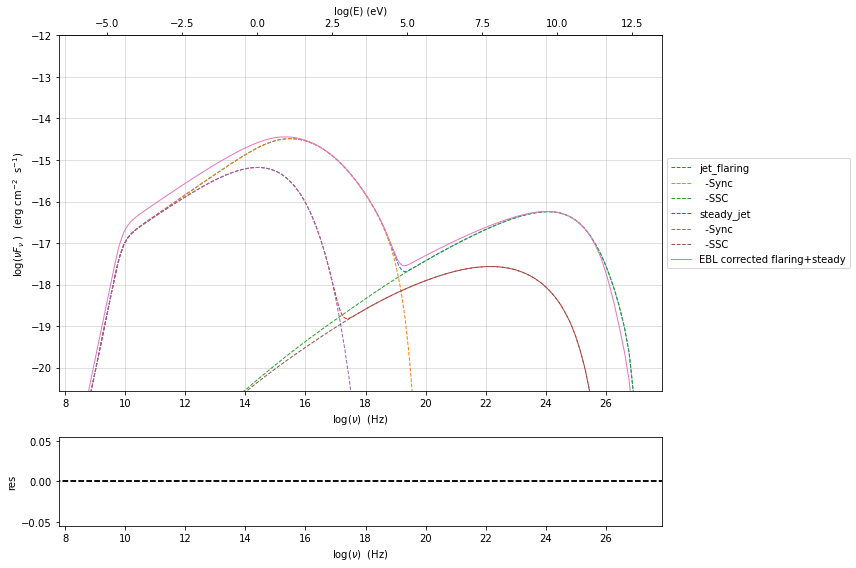

In [32]:
composite_model.eval()
p=composite_model.plot_model()
p.rescale(y_max=-12)

In [33]:
composite_model.save_model('composite.pkl')

In [34]:
cm=FitModel.load_model('composite.pkl')

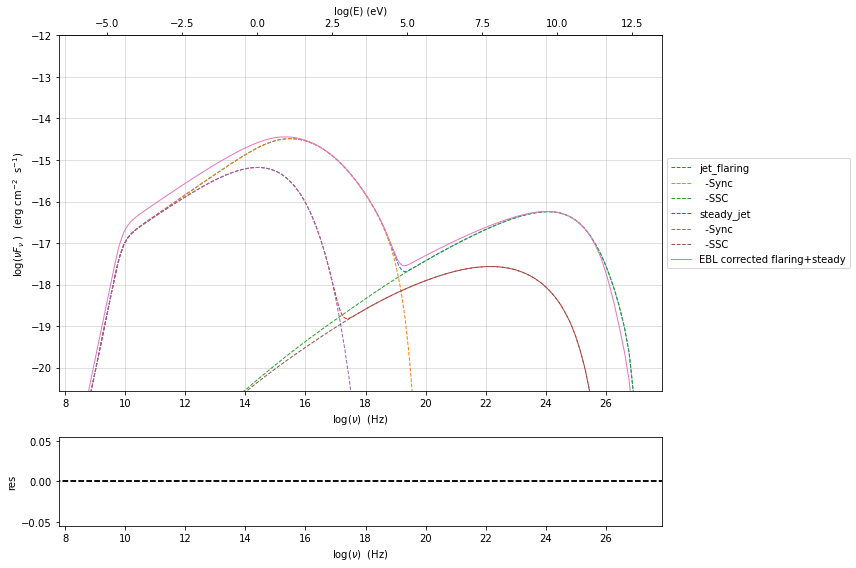

In [35]:
p=cm.plot_model()
p.rescale(y_max=-12)